7/28 (Mon)

---

# Frequency Analysis of Raw Codes in L2 Japanese Pragmatics Instruction Research

To synthesize target, treatment, learner, outcome measure features, this notebook calculates frequency/proportion of identified codes.

The following code block imports Python packages.

In [179]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

The following code block defines a global variable of the path to data directry.

In [2]:
DATA_DIR = Path.cwd().parents[1] / "data"

### Utility Functions

The following code block defines a function to calculate the frequency and proportion of a single-value column.

In [98]:
def calculate_freq_prop_in_singlevalue_column(
        df: pd.DataFrame, col_lvl_1: str, col_lvl_2: str, col_lvl_3: str
) -> pd.DataFrame:
    df_freq_prop = df.groupby(
        by=(col_lvl_1, col_lvl_2, col_lvl_3)
    ).agg(
        N=((col_lvl_1, col_lvl_2, col_lvl_3), "count")
    ).eval(
        "Prop = N / N.sum()"
    ).sort_values(
        by="N", ascending=False
    ) # type: ignore

    return df_freq_prop

The following code block defines a function to calculate the frequency and proportion of a multi-value column.

In [ ]:
def calculate_freq_prop_in_multivalue_column(
        df: pd.DataFrame, col_lvl_1: str, col_lvl_2: str, col_lvl_3: str
) -> pd.DataFrame:
    target_column = df.loc[:, (col_lvl_1, col_lvl_2, col_lvl_3)] # type: ignore

    values = []
    for val_raw in target_column:
        if pd.isna(val_raw):
            continue

        values += val_raw.split(", ")

    df_tmp = pd.DataFrame([values, values], index=[col_lvl_3, "val"]).T

    df_freq_prop = df_tmp.groupby(
        by=col_lvl_3
    ).agg(
        N=("val", "count")
    ).eval(
        "Prop = N / N.sum()"
    ).sort_values(
        by="N", ascending=False
    ) # type: ignore

    return df_freq_prop

## 1. Data Loading

The following code block loads the table of coding results (data/external/coding_result_ver_1.tsv).

In [46]:
tsv_path = DATA_DIR / "external/coding_result_ver_1.tsv"

df_coding_result_raw = pd.read_table(tsv_path, sep="\t", header=None)
df_coding_result = df_coding_result_raw.iloc[3:, :]

# 以下，multiple columns の準備
columns_raw = pd.MultiIndex.from_frame(df_coding_result_raw.iloc[:3, :].T)
columns_new = []

prev_col_lvl_1 = ""
prev_col_lvl_2 = ""
prev_col_lvl_3 = ""

for col in columns_raw:
    cur_col_lvl_1 = col[0]
    cur_col_lvl_2 = col[1]
    cur_col_lvl_3 = col[2]

    # 元の column の値が NA だった場合，その前の column の値で埋める
    if pd.isna(cur_col_lvl_1):
        cur_col_lvl_1 = prev_col_lvl_1
    if pd.isna(cur_col_lvl_2):
        cur_col_lvl_2 = prev_col_lvl_2
    if pd.isna(cur_col_lvl_3):
        cur_col_lvl_3 = prev_col_lvl_3

    # prev_col を更新
    prev_col_lvl_1 = cur_col_lvl_1
    prev_col_lvl_2 = cur_col_lvl_2
    prev_col_lvl_3 = cur_col_lvl_3

    columns_new.append((cur_col_lvl_1, cur_col_lvl_2, cur_col_lvl_3))

columns_new = pd.MultiIndex.from_tuples(columns_new, names=[0, 1, 2])

df_coding_result.columns = columns_new
df_coding_result = df_coding_result.reset_index(drop=True)

The following code block shows the first five rows of the table.

In [47]:
df_coding_result.head()

0 Meta Info                                                     \
1                                                                
2  Study ID Paper IDs           Authors  Year Publication Type   
0         1         1             Gyogi  2016          Journal   
1         2         2           Yoshimi  2001     Book Chapter   
2       NaN       NaN               NaN   NaN              NaN   
3         3         3  Utashiro & Kawai  2009     Book Chapter   
4         4         4          Kakegawa  2009     Book Chapter   

0                             \
1                              
2               Study Design   
0    Pretest-Posttest Design   
1  Quasi-Experimental Design   
2                        NaN   
3    Pretest-Posttest Design   
4    Pretest-Posttest Design   

0                                                     \
1                                                      
2                                   Short Annotation   
0  This study examined whether an indexical appro...   
1  This study examined the imapcts of explicit pr...   
2                                                NaN   
3  This study investigated the facilitative role ...   
4  This study examined the impacts of explicit in...   

0                         Target Feature                  \
1                                                          
2                       Pragmatic Target Speech Act Type   
0                 Honorific/Plain Styles             NaN   
1         Interactional Discourse Marker             NaN   
2                                    NaN             NaN   
3                        Reactive Tokens             NaN   
4  Interactional Sentence Final Particle             NaN   

0                                  ...  \
1                                  ...   
2                Linguistic Items  ...   
0                      desu, masu  ...   
1  n desu, n desu kedo, n desu ne  ...   
2                             NaN  ...   
3   ee, soo desu ka, mm, naruhodo  ...   
4                ne, yo, no, yone  ...   

0                                                           Results  \
1                                                Outcome Measures 3   
2 Potential Moderators/Reasons for Variety in Between-group Results   
0                                                NaN                  
1                                                NaN                  
2                                                NaN                  
3                                                NaN                  
4                                                NaN                  

0                                                                                \
1                                                                                 
2 Evidence of Potential Moderators/Reasons for Variety in Between-group Results   
0                                                NaN                              
1                                                NaN                              
2                                                NaN                              
3                                                NaN                              
4                                                NaN                              

0                                                        \
1   Outcome Measures 4                                    
2 Within-group Results Reasons for Within-group Results   
0                  NaN                              NaN   
1                  NaN                              NaN   
2                  NaN                              NaN   
3                  NaN                              NaN   
4                  NaN                              NaN   

0                                                                   \
1                                                                    
2 Potential Moderators/Reasons for Variety in Within-group Results   
0                             

## 2. Analysis

### 2.1. Target Features

This subsection calculates the frequency and proportion of target features.

The following code block shows the all identified pragmatic targets.

In [48]:
df_coding_result.loc[:, "Target Feature"].dropna(how="all")

1                                          \
2                        Pragmatic Target   
0                  Honorific/Plain Styles   
1          Interactional Discourse Marker   
3                         Reactive Tokens   
4   Interactional Sentence Final Particle   
5                              Speech Act   
7                              Speech Act   
9               Hearsay Evidential Marker   
11  Interactional Sentence Final Particle   
13                             Speech Act   
14                 Honorific/Plain Styles   
19                             Speech Act   
20                             Speech Act   
21         Interactional Discourse Marker   
23         Interactional Discourse Marker   
25                             Small Talk   

1                                                      \
2                                     Speech Act Type   
0                                                 NaN   
1                                                 NaN   
3                                                 NaN   
4                                                 NaN   
5   Getting Attention, Apologizing, Expressing Gra...   
7                                      Making Request   
9                                                 NaN   
11                                                NaN   
13  Apologizing, Complaimenting, Making Request, R...   
14                                                NaN   
19                               Expressing Gratitude   
20                               Expressing Gratitude   
21                                                NaN   
23                                                NaN   
25                                                NaN   

1                                           
2                         Linguistic Items  
0                               desu, masu  
1           n desu, n desu kedo, n desu ne  
3            ee, soo desu ka, mm, naruhodo  
4                         ne, yo, no, yone  
5                                sumimasen  
7                                      NaN  
9                                      NaN  
11                            ne, yo, yone  
13                                     NaN  
14                              desu, masu  
19                                     NaN  
20                                     NaN  
21                                  n desu  
23                       n desu, n desu ka  
25  n desu, a soo desu ka, ne, soo desu ne

The following code block counts the frequencies of pragmatic targets and calculates their proportion. 
The table shows that:
- the majority of studies targeted speech act ($N=5\, (33.3\%)$).
- Interactional discourse marker (e.g., n desu) was the second most examined target ($N=3\, (20.0\%)$).
- Honorific/plain styles (e.g., desu) and interactional sentence final particles (e.g., ne, yo, yone) follows them ($N=2\, (13.3\%)$).
- Hearsay evidential marker, reactive tokens, and small talk were each addressed by only one study ($6.7\%$).

In [100]:
calculate_freq_prop_in_singlevalue_column(df_coding_result, "Target Feature", "", "Pragmatic Target")

,N,Prop
"(Target Feature, , Pragmatic Target)",,
Speech Act,5,0.333333
Interactional Discourse Marker,3,0.200000
Honorific/Plain Styles,2,0.133333
Interactional Sentence Final Particle,2,0.133333
Hearsay Evidential Marker,1,0.066667
Reactive Tokens,1,0.066667
Small Talk,1,0.066667


The following code block further calculates the frequencies and proportions of specific speech act targets.

In [90]:
calculate_freq_prop_in_multivalue_column(df_coding_result, "Target Feature", "", "Speech Act Type")

,N,Prop
Speech Act Type,,
Expressing Gratitude,4,0.363636
Apologizing,2,0.181818
Making Request,2,0.181818
Complaimenting,1,0.090909
Getting Attention,1,0.090909
Refusing,1,0.090909


The following code block calculates the frequencies and proportions of targeted linguistic items.

In [101]:
calculate_freq_prop_in_multivalue_column(df_coding_result, "Target Feature", "", "Linguistic Items")

,N,Prop
Linguistic Items,,
n desu,4,0.153846
ne,3,0.115385
yone,2,0.076923
yo,2,0.076923
masu,2,0.076923
desu,2,0.076923
sumimasen,1,0.038462
soo desu ne,1,0.038462
soo desu ka,1,0.038462


### 2.2. Treatment Features

This subsection calculates the frequency and proportion of treatment features.

The following code block shows the entire coding results of treatment features.

In [132]:
df_group = df_coding_result.loc[:, ("Learner Features", "", "Group")] # type: ignore
df_treatment = df_coding_result.loc[:, "Instructional Feature"]
df_treatment.columns = df_treatment.columns.get_level_values(2)

pd.concat([df_group, df_treatment], axis=1).dropna(how="all")

,"(Learner Features, , Group)",Intervention Length,Meta Pragmatic Information,Input,Input Enhancement,Input Materials,Inductive Consciousness-Raising,Deductive Consciousness-Raising,Production,Production Task,Journal Writing/ Self-reflection,Feedback,Discussion
0,NaN,Medium Treatments,FALSE,TRUE,FALSE,"Text Blogs, Text News Articles",TRUE,FALSE,TRUE,Text Translation,TRUE,TRUE,TRUE
1,Experimental,Long Treatments,TRUE,TRUE,FALSE,Oral Interaction between L1s,FALSE,FALSE,TRUE,Oral Story Telling Task with an L1,FALSE,TRUE,TRUE
2,Control,Long Treatments,FALSE,FALSE,FALSE,NaN,FALSE,FALSE,TRUE,Oral Unscripted Interaction with L1s,FALSE,FALSE,FALSE
3,NaN,Medium Treatments,TRUE,TRUE,FALSE,Oral Interaction Video,FALSE,TRUE,TRUE,"Fill-in-the-blank Task, Oral Role-plays with a...",FALSE,FALSE,FALSE
4,NaN,Medium Treatments,TRUE,TRUE,TRUE,Emails,FALSE,TRUE,TRUE,Email Correspondence,FALSE,TRUE,TRUE
5,Explicit,Medium Treatments,TRUE,TRUE,FALSE,Oral Interaction Video,FALSE,FALSE,TRUE,Discourse Completion Task,TRUE,FALSE,TRUE
6,Implicit,Medium Treatments,FALSE,TRUE,FALSE,Oral Interaction Video,TRUE,FALSE,TRUE,Discourse Completion Task,TRUE,FALSE,FALSE
7,Explicit,Medium Treatments,TRUE,TRUE,FALSE,"Oral Interaction between L1s, Oral Interaction...",TRUE,FALSE,TRUE,"Oral Role-plays with an L2, Oral Role-plays wi...",TRUE,TRUE,TRUE
8,Explicit Expanded,Medium Treatments,TRUE,TRUE,FALSE,Reading Exercise,FALSE,FALSE,TRUE,Oral Role-plays with an L2,FALSE,FALSE,FALSE
9,Experimental,Medium Treatments,FALSE,TRUE,FALSE,Text Transcription of Monologue,TRUE,FALSE,FALSE,NaN,FALSE,FALSE,FALSE


The following code block calculates the frequency and proportion of treatment length.

In [135]:
df_treatment.groupby(by="Intervention Length").agg(N=("Intervention Length", "count")).eval("Prop = N / N.sum()")

,N,Prop
Intervention Length,,
Long Treatments,13,0.464286
Medium Treatments,11,0.392857
Short Treatments,4,0.142857


The following code block calculates the frequencies of each component.

In [202]:
mask_control_group = df_group.fillna("-").str.startswith("Control")
df_treatment_experimental = df_treatment[~mask_control_group]

components = [
    "Meta Pragmatic Information",
    "Input",
    "Input Enhancement",
    "Inductive Consciousness-Raising",
    "Deductive Consciousness-Raising",
    "Production",
    "Journal Writing/ Self-reflection",
    "Feedback",
    "Discussion"
]

freq_list = []
for component in components:
    freq = df_treatment_experimental.groupby(by=component).agg({component: "count"}).T.values[0] # type: ignore
    freq_list.append(freq)

df_freq = pd.DataFrame(data=freq_list, index=components, columns=["Not Included", "Included"])
df_freq

,Not Included,Included
Meta Pragmatic Information,4,18
Input,1,21
Input Enhancement,19,3
Inductive Consciousness-Raising,14,8
Deductive Consciousness-Raising,16,6
Production,5,17
Journal Writing/ Self-reflection,14,8
Feedback,13,9
Discussion,7,15


The following code block draws the heatmap of the proportions of each component. 
The results showed that:
- Most studies included meta pragmatic information ($81.8\%$), input ($95.5\%$), production ($77.3\%$), and discussion ($68.2\%$).
- In contrast, input enhancement ($13.6\%$), inductive consciounsness-raising ($36.4\%$), deductive consciousness-raising ($27.3\%$), journal writing/self-reflection ($36.4\%$), and feedback ($40.9\%$) were less employed components.

<Axes: >

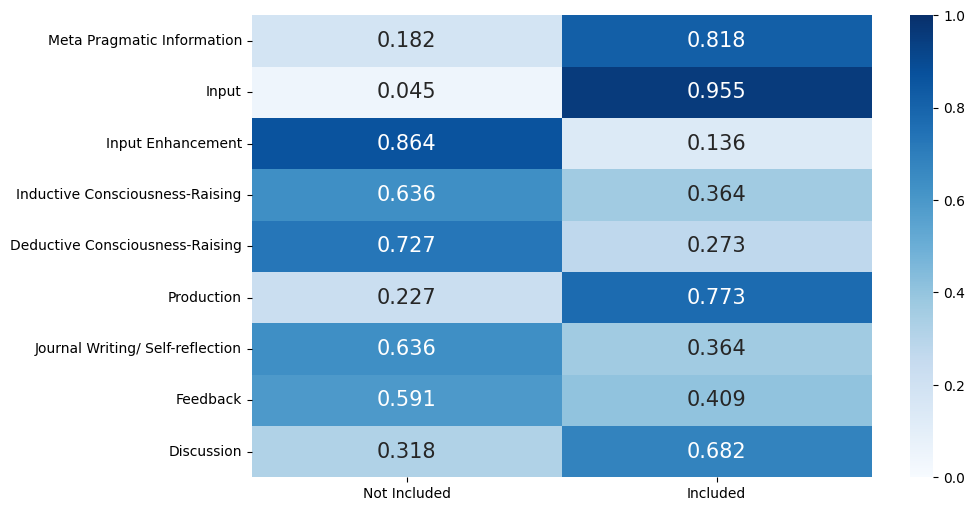

In [203]:
normalizer = (~mask_control_group).sum()
df_prop = df_freq / normalizer

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df_prop, vmax=1, vmin=0, center=0.5, cmap="Blues", annot=True, annot_kws={"size": 15}, fmt=".3f")

The follwing code block calculates the frequency and proportion of input materials.

In [204]:
calculate_freq_prop_in_multivalue_column(df_coding_result, "Instructional Feature", "", "Input Materials")

,N,Prop
Input Materials,,
Oral Interaction Video,10,0.31250
Text Dialogue,5,0.15625
Text Transcription of L1 Interaction,5,0.15625
Oral Interaction between L1s,2,0.06250
Oral L1 Utterance,2,0.06250
Reading Exercise,2,0.06250
Text Sentence,2,0.06250
Emails,1,0.03125
Text Blogs,1,0.03125


The following code block calculates the frequency and proportion of production tasks.

In [205]:
calculate_freq_prop_in_multivalue_column(df_coding_result, "Instructional Feature", "", "Production Task")

,N,Prop
Production Task,,
Oral Role-plays with an L2,11,0.305556
Oral Unscripted Interaction with L1s,6,0.166667
Discourse Completion Task,5,0.138889
Fill-in-the-blank Task,3,0.083333
Oral Unscripted Interaction with L2s,2,0.055556
Small Talk with L2s,2,0.055556
Audio-visual Fill-in-the-blank Task,1,0.027778
Email Correspondence,1,0.027778
Oral Role-plays with an L1,1,0.027778


### 2.3. Learner Features

This subsection calculates the frequency and proportion of learner features, more specifically proficiency levels/class year levels.

The following code block shows the overall codes of proficiency levels and class year levels.

In [206]:
df_coding_result.loc[:, [("Learner Features", "", "Proficiency Level"), ("Learner Features", "", "Class Year Level")]]

0         Learner Features                    
1                                             
2        Proficiency Level    Class Year Level
0             Intermediate            2nd Year
1                      NaN            3rd Year
2                      NaN            3rd Year
3   Intermediate, Advanced                 NaN
4             Intermediate            2nd Year
5                   Novice            1st Year
6                   Novice            1st Year
7             Intermediate            2nd Year
8             Intermediate            2nd Year
9                      NaN            3rd Year
10                     NaN            3rd Year
11                     NaN            2nd Year
12                     NaN            2nd Year
13    Novice, Intermediate            3rd Year
14                  Novice            1st Year
15                  Novice            1st Year
16                  Novice            1st Year
17                  Novice            1st Year
18                  Novice            1st Year
19            Intermediate            3rd Year
20                Advanced            4th Year
21  Intermediate, Advanced  3rd Year, 4th Year
22  Intermediate, Advanced  3rd Year, 4th Year
23                     NaN            2nd Year
24                     NaN            2nd Year
25                     NaN            1st Year
26                     NaN            1st Year
27                     NaN            1st Year

Since there are tendency that:
- 1st year class targets beginner level learners (e.g., index 5, 6); 
- 2nd and 3rd year class target intermediate level learners (e.g., index 0, 4, 7, 8, 13, 19, 21, 22);
- 4th year class targets advanced level learners (e.g., index 20, 21, 22),

the following code block converts class year levels to proficiency levels (1st → novice; 2nd & 3rd → intermediate; 4th → advanced).

In [219]:
col_prof_lvl = ("Learner Features", "", "Proficiency Level")
col_class_lvl = ("Learner Features", "", "Class Year Level")
df_learner = df_coding_result.loc[:, [col_prof_lvl, col_class_lvl]]

converter = {
    "1st Year": "Novice",
    "2nd Year": "Intermediate",
    "3rd Year": "Intermediate",
    "4th Year": "Advanced"
}

for grade in converter.keys():
    mask = df_learner[col_class_lvl].str.contains(grade) & df_learner[col_prof_lvl].isna()
    df_learner.loc[mask, col_prof_lvl] = converter[grade]

df_learner

0         Learner Features                    
1                                             
2        Proficiency Level    Class Year Level
0             Intermediate            2nd Year
1             Intermediate            3rd Year
2             Intermediate            3rd Year
3   Intermediate, Advanced                 NaN
4             Intermediate            2nd Year
5                   Novice            1st Year
6                   Novice            1st Year
7             Intermediate            2nd Year
8             Intermediate            2nd Year
9             Intermediate            3rd Year
10            Intermediate            3rd Year
11            Intermediate            2nd Year
12            Intermediate            2nd Year
13    Novice, Intermediate            3rd Year
14                  Novice            1st Year
15                  Novice            1st Year
16                  Novice            1st Year
17                  Novice            1st Year
18                  Novice            1st Year
19            Intermediate            3rd Year
20                Advanced            4th Year
21  Intermediate, Advanced  3rd Year, 4th Year
22  Intermediate, Advanced  3rd Year, 4th Year
23            Intermediate            2nd Year
24            Intermediate            2nd Year
25                  Novice            1st Year
26                  Novice            1st Year
27                  Novice            1st Year

The following code block calculates the frequency and proportion of targeted proficiency levels in a group level.

In [220]:
calculate_freq_prop_in_multivalue_column(df_learner, "Learner Features", "", "Proficiency Level")

,N,Prop
Proficiency Level,,
Intermediate,17,0.53125
Novice,11,0.34375
Advanced,4,0.12500


The following code block calculates the frequency and proportion of targeted proficiency levels in a study level.
The results showed that:
- Most studies focues on intermediate level learners ($N=11\, (61.1\%)$);
- Novice and advanced level learners were less targeted ($N=4, 3\, (22.2\%, 16.7\%)$, respectively)

In [222]:
mask = (~df_coding_result[("Meta Info", "", "Study ID")].isna())
calculate_freq_prop_in_multivalue_column(df_learner[mask], "Learner Features", "", "Proficiency Level")

,N,Prop
Proficiency Level,,
Intermediate,11,0.611111
Novice,4,0.222222
Advanced,3,0.166667


### 2.4. Outcome Measures

This subsection calculates the frequency and proportion of outcome measures.

The following code block shows the overall results of outcome measure codes.

In [223]:
df_coding_result["Assessment Feature"]

1                                              \
2  Qualitative Analysis Quantitative Analysis   
0                  TRUE                 FALSE   
1                  TRUE                  TRUE   
2                 FALSE                 FALSE   
3                 FALSE                  TRUE   
4                  TRUE                  TRUE   
5                  TRUE                  TRUE   
6                 FALSE                 FALSE   
7                  TRUE                  TRUE   
8                 FALSE                 FALSE   
9                  TRUE                  TRUE   
10                FALSE                 FALSE   
11                 TRUE                  TRUE   
12                FALSE                 FALSE   
13                 TRUE                  TRUE   
14                 TRUE                  TRUE   
15                FALSE                 FALSE   
16                FALSE                 FALSE   
17                FALSE                 FALSE   
18                FALSE                 FALSE   
19                 TRUE                  TRUE   
20                 TRUE                  TRUE   
21                FALSE                  TRUE   
22                FALSE                 FALSE   
23                FALSE                  TRUE   
24                FALSE                 FALSE   
25                 TRUE                  TRUE   
26                FALSE                 FALSE   
27                FALSE                 FALSE   

1                                                      \
2                            Quantitative Report Type   
0                                                 NaN   
1                                           Frequency   
2                                                 NaN   
3            Statistical Test, Descriptive Statistics   
4                                           Frequency   
5   Statistical Test, Scores/Ratings, Descriptive ...   
6                                                 NaN   
7   Frequency, Statistical Test, Descriptive Stati...   
8                                                 NaN   
9            Statistical Test, Descriptive Statistics   
10                                                NaN   
11                                          Frequency   
12                                                NaN   
13             Scores/Ratings, Descriptive Statistics   
14                  Frequency, Descriptive Statistics   
15                                                NaN   
16                                                NaN   
17                                                NaN   
18                                                NaN   
19                                          Frequency   
20                                          Frequency   
21           Statistical Test, Descriptive Statistics   
22                                                NaN   
23           Descriptive Statistics, Statistical Test   
24                                                NaN   
25                                          Frequency   
26                                                NaN   
27                                                NaN   

1                                                         \
2                 Statistical Test Type Delayed Posttest   
0                                   NaN            FALSE   
1                                   NaN            FALSE   
2                                   NaN            FALSE   
3   ANOVA, Post-hoc Multiple Comparison             TRUE   
4                                   NaN            FALSE   
5                                 ANOVA            FALSE   
6                                   NaN            FALSE   
7                ANOVA, Chi-square Test            FALSE   
8                                   NaN            FALSE   
9                                 ANOVA             TRUE   
10                                  NaN            FALSE   
11                                  Na

The following code block summarizes the reporting methods of outcome measures. 
The results showed that:
- 11 studies employed mixed-methods;
- 1 study employed a quantitative approach
- 3 studies employed a qualitative approach

In [230]:
df_coding_result.groupby(
    by=[
        ("Assessment Feature", "", "Qualitative Analysis"),
        ("Assessment Feature", "", "Quantitative Analysis")
    ]
).agg(
    N=(("Meta Info", "", "Study ID"), "count")
)

N
(Assessment Feature, , Qualitative Analysis) (Assessment Feature, , Quantitative Analysis)    
FALSE                                        FALSE                                           0
                                             TRUE                                            3
TRUE                                         FALSE                                           1
                                             TRUE                                           11

The following code block further analyzes the quantitative reporting methods.
The results showed that less than half studies employed statistical tests ($N=6\, (40\%)$).
All of those studies used ANOVA ($N=6$).

In [237]:
df_quantitative_reports = df_coding_result.loc[:, ("Assessment Feature", "", "Quantitative Report Type")]

n_stats_test = df_quantitative_reports.str.contains("Statistical Test").sum()
n_study = (~df_coding_result.loc[:, ("Meta Info", "", "Study ID")].isna()).sum()

print(f"N studies using statistical tests: {n_stats_test} ({n_stats_test / n_study * 100:.3f}%)")

calculate_freq_prop_in_multivalue_column(df_coding_result, "Assessment Feature", "", "Statistical Test Type")

N studies using statistical tests: 6 (40.000%)


,N,Prop
Statistical Test Type,,
ANOVA,6,0.6
Chi-square Test,1,0.1
Post-hoc Multiple Comparison,1,0.1
Regression Analysis,1,0.1
t-test,1,0.1


The following code block calculates the frequency and proportion of outcome measures.

In [254]:
outcome_measures = []

for measure_no in range(1, 5):
    df_outcome_measure = df_coding_result.loc[:, ("Assessment Feature", "", f"Outcome Measure {measure_no}")].dropna()
    outcome_measures += df_outcome_measure.to_list()

df_outcome_measure = pd.DataFrame(
    data = outcome_measures, 
    columns=pd.MultiIndex.from_tuples([("", "", "Outcome Measures")], names=[0, 1, 2])
)

calculate_freq_prop_in_singlevalue_column(df_outcome_measure, "", "", "Outcome Measures")

,N,Prop
"(, , Outcome Measures)",,
Multiple-Choice Tests,5,0.166667
Discourse Completion Task,4,0.133333
Oral Discourse Completion Task,3,0.100000
Retrospective Interview,3,0.100000
Acceptability Judgment,2,0.066667
Oral Spontaneous Interaction,2,0.066667
Role-plays,2,0.066667
Self-evaluation,2,0.066667
Email Correspondence,1,0.033333
